In [1]:
%run init_notebook.py

In [2]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import os

from settings import DATA_DIR, weights, ticker_etfc, ticker_trade
from src.classes import AllocationEval, DataPull, Eval
from utils.utils import apply_datetime_format

In [3]:
list_weeeks = []
for item in range(1, 10):
    list_weeeks.append(item * 7)

In [4]:
list_weeeks

[7, 14, 21, 28, 35, 42, 49, 56, 63]

In [11]:
i.data

,ASHR.L,XCS6.DE,IMV.L,NASD.L,FSKY.L,BATT.L,XAIX.DE,RBOD.L,DGIT.L,IPRV.L
Date,,,,,,,,,,
2007-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1291.00
2007-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302.00
2007-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321.00
2007-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321.00
2007-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1310.00
...,...,...,...,...,...,...,...,...,...,...
2021-08-17,14.6025,17.428,4702.75,59.425,3164.50,18.380,80.46,8.9250,790.000,2311.50
2021-08-18,14.7525,17.526,4710.00,59.410,3178.25,18.412,80.86,8.9700,792.375,2305.25
2021-08-19,14.6800,17.068,4686.50,59.145,3163.00,17.956,79.99,8.8637,792.125,2267.75


#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


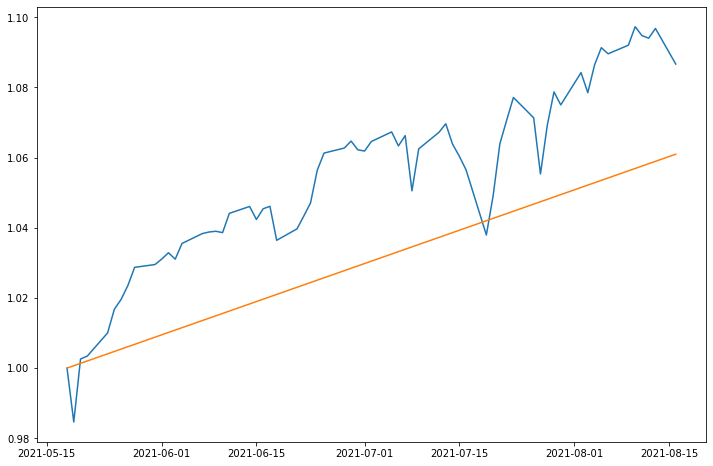

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


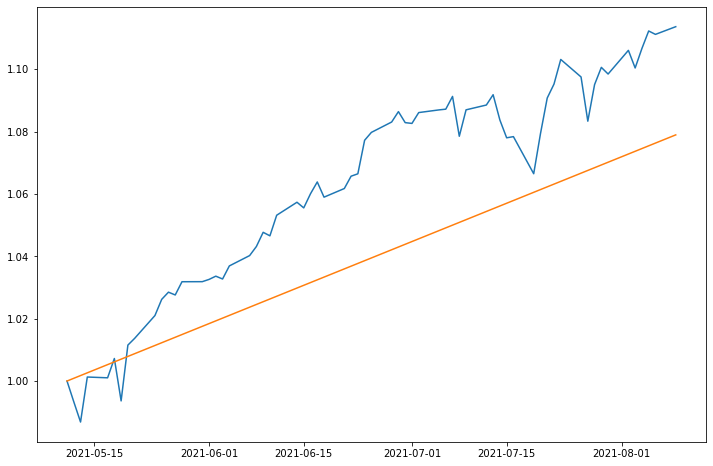

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


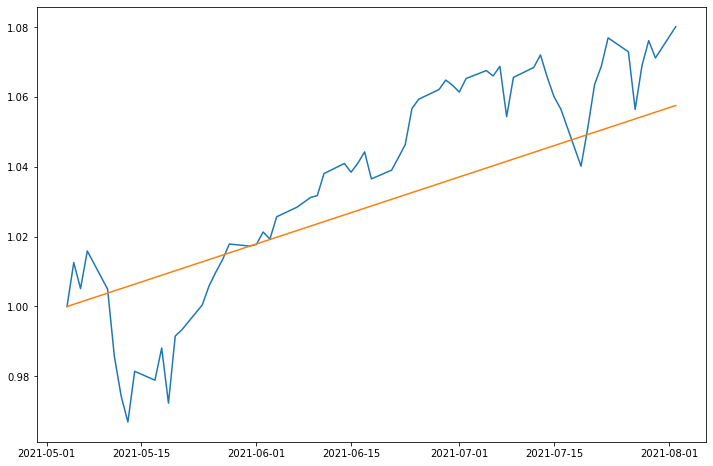

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


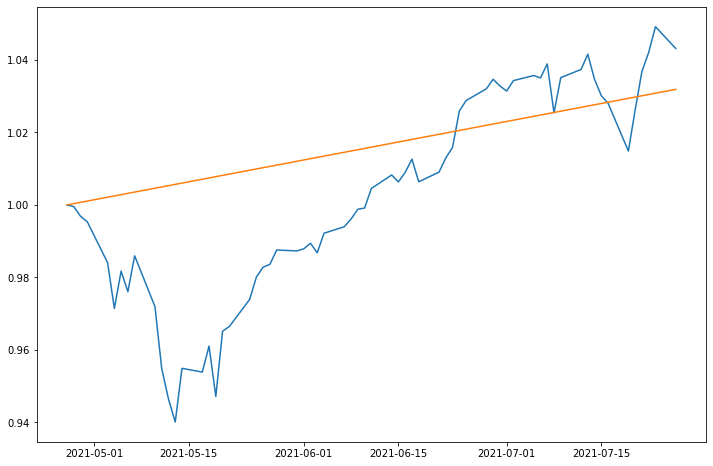

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


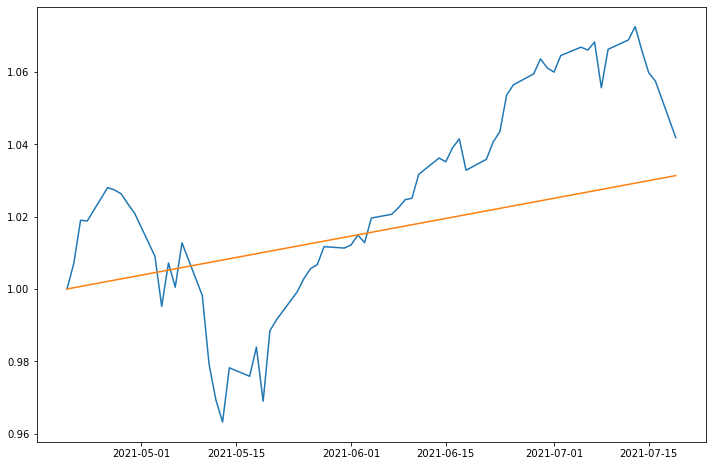

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


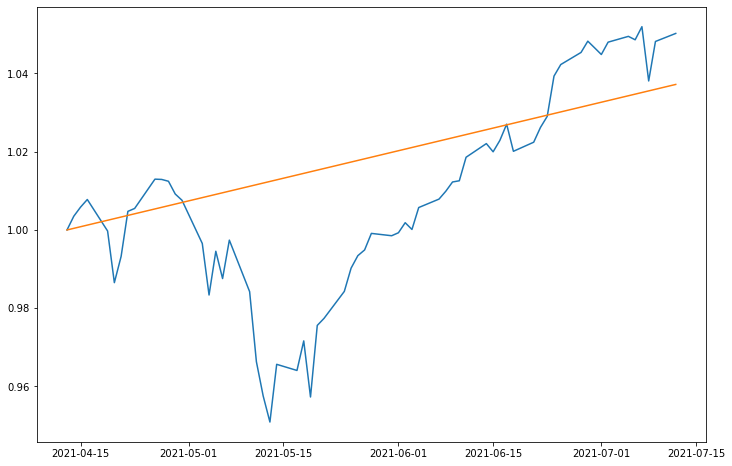

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


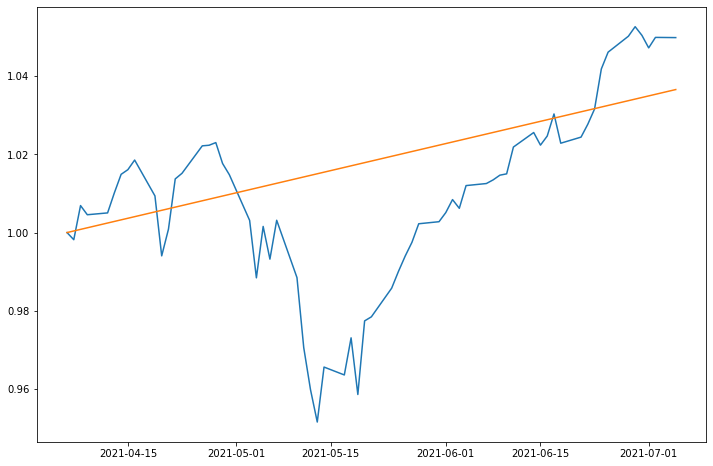

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


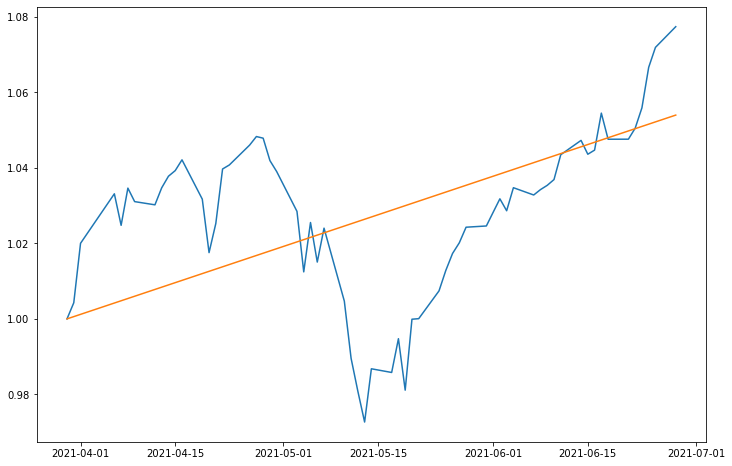

#######################################
Pulling Data
data_trade
Checking data creation date
data_trade is already up to date
Checking order of data index
Data needed ordering
'###### ATTENTION NOT ALL DATA FROM HAS BEEN PUlLED CORRECTLY ######'
"MISSING COLUMNS ARE ['LOIL.L']"
#######################################
Allocation Evaluation


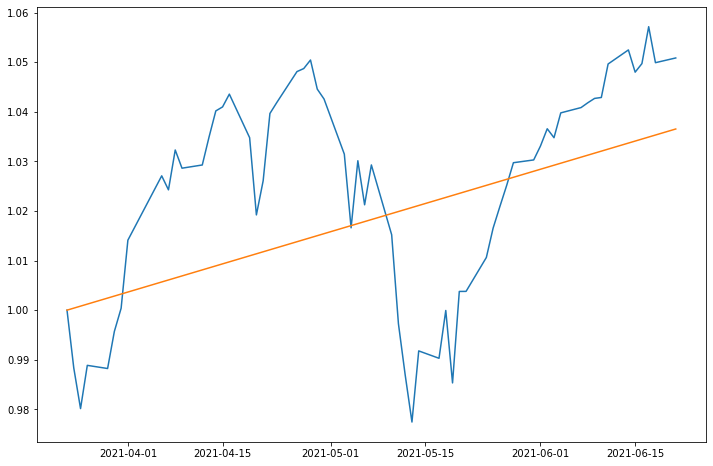

In [12]:
for i, item in enumerate(list_weeeks):
    
    i = Eval(time_lag=item, weights=weights, time_window=6, filename="data_trade", ticker=ticker_trade)

    plt.figure(figsize=(12, 8))

    plt.plot(i.data[i.x1_month : i.x0_month].apply(lambda x: (x / x.dropna()[0]) * i.sugg_weight[x.name]).sum(axis=1))
    plt.plot([i.data[i.x1_month : i.x0_month].index[0], i.data[i.x1_month : i.x0_month].index[-1]],
             [1, 1 + i.ret * len(i.data[i.x1_month : i.x0_month])])
    
    plt.show()

In [29]:
%%capture
list1 = []

for item in list_weeeks:
    x_month = 6
    x0_month_past = (dt.datetime.now() - dt.timedelta(item)).date()
    x1_month_past = ((dt.datetime.now() - dt.timedelta(item)) - dt.timedelta(30 * (x_month) / 2)).date()
    x2_month_past = ((dt.datetime.now() - dt.timedelta(item)) - dt.timedelta(30 * x_month)).date()

    data = DataPull(ticker=ticker_etfc,
                         request_data_name="Time Series (Daily)",
                         file_name='data_etfc.csv').run().reset_index()
    data["Date"] = data.Date.apply(lambda x: apply_datetime_format(x))
    data.set_index("Date", inplace=True)
    
    
    x1 = data[x2_month_past : x1_month_past].copy()
    x2 = data[x1_month_past : x0_month_past].copy()
    
    data = AllocationEval(x1, 
                          weights=weights,
                          return_period="D").run()
    
    sugg_weight = dict(zip(data.sort_values("Sharp_ratio").iloc[-1][list(ticker_etfc.values())].index,
                       data.sort_values("Sharp_ratio").iloc[-1][list(ticker_etfc.values())].values))
    
    ret = (x2.resample("D").last().pct_change().mean() * list(sugg_weight.values())).sum()
    
    list1.append([x0_month_past, x1_month_past, x2_month_past, ret, sugg_weight])